In [1]:
import numpy as np
import pandas as pd
from speedboot import speedboot

##### You are given a random sample of size n from a population

In [16]:
n = 1000
n_sample = pd.DataFrame({"age": np.random.normal(50,10,n),
                         "height": np.random.normal(1.7,.2,n),
                         "weight": np.random.normal(65,10,n)})
n_sample.head()

,age,height,weight
0,42.767632,1.864750,68.173655
1,50.192662,1.654604,70.543213
2,61.416001,1.618800,54.041024
3,65.657727,1.798257,70.983286
4,42.188275,1.571528,55.354185


##### Using this sample you wish to estimate the mean age and mean BMI for the population form which we are sampling

In [3]:
def estimators(X):
    '''Estimators for the mean age and mean BMI of a population'''
    return np.array([np.mean(X['age']), np.mean(X['weight']/X['height']**2)])

(age_hat, bmi_hat) = estimators(n_sample)

print(f'estimated mean age is {age_hat:.2f}')
print(f'estimated mean BMI is {bmi_hat:.2f}')

estimated mean age is 50.54
estimated mean BMI is 23.41


##### Instanciate speedboot with the sample and the estimator function

In [4]:
speedboot_object = speedboot(data=n_sample, stats_fun=estimators)

##### Run the bootstrap with 999 iterations

In [5]:
speedboot_object.fit(R=999, bar=True, seed=123)

100%|██████████| 999/999 [00:00<00:00, 1390.27it/s]


##### Parallelize computations for speed

In [6]:
speedboot_object.fit(R=999, bar=True, par=True, seed=123)

100%|██████████| 999/999 [00:01<00:00, 658.02it/s] 


##### Recover point estimates

In [7]:
speedboot_object.ests

array([50.53602994, 23.40755434])

##### Recover bootstrap estimates

In [8]:
pd.DataFrame(speedboot_object.ests_boot, columns=['age_hats', 'BMI_hats'])

,age_hats,BMI_hats
0,50.444852,23.199330
1,50.492972,23.594768
2,50.702855,23.052693
3,50.754594,23.427204
4,50.703277,23.347436
...,...,...
994,51.287956,23.394546
995,50.669531,23.389515
996,50.884023,23.451116
997,50.124097,23.594405


##### Plot histograms for normality check

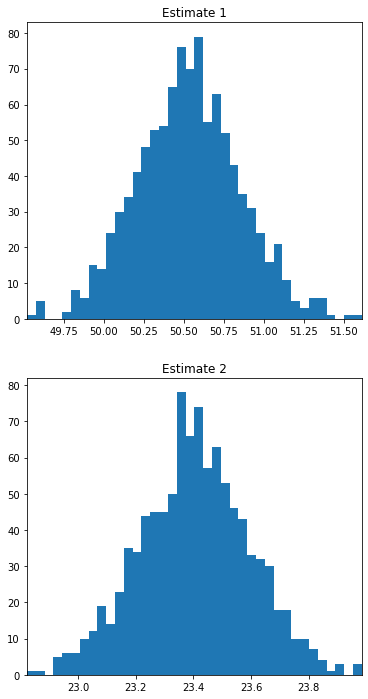

In [14]:
speedboot_object.plot(prec=.04, size=6)

##### Compute 90% percentile confidence intervals

In [15]:
speedboot_object.per_ci(alpha=.1)

array([[50.1203215 , 50.94605814],
       [23.16172784, 23.65095652]])

##### Compute 90% empirical confidence intervals

In [11]:
speedboot_object.emp_ci(alpha=.1)

array([[50.12600174, 50.95173838],
       [23.16415216, 23.65338084]])